In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv("RECLAMEAQUI_HAPVIDA.csv")

In [3]:
df.head(5)

,ID,TEMA,LOCAL,TEMPO,CATEGORIA,STATUS,DESCRICAO,URL,ANO,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,DIA_DA_SEMANA,TRIMETRES,CASOS
0,149490335,TEMPO DE ATENDIMENTO,Recife - PE,2022-01-09,Demora na execução<->Plano<->Planos de Saúde<-...,Não respondida,Acabei de sair de uma urgência por causa de at...,https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66
1,149499817,Hapvida não tem nutrólogo,Salvador - BA,2022-01-09,Planos de saúde<->Qualidade do serviço prestad...,Não respondida,O Hapvida diz que fornece o serviço de nutrólo...,https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66
2,149498293,Descaso de tratamento de Hemodiálise,Olinda - PE,2022-01-09,"Demora para autorização de consultas, exames e...",Respondida,"Meu irmão Wagner Santiago, estava internado de...",https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66
3,149495455,DESORGANIZAÇÃO E FALTA DE RESOLUÇÃO DE PROBLEMA,Goiânia - GO,2022-01-09,Demora na execução<->Planos de saúde<->Planos ...,Não respondida,Agendei pelo chat um procedimento onde fui bem...,https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66
4,149495285,Liberação de Procedimento,Fortaleza - CE,2022-01-09,Planos de saúde<->Planos de Saúde<->Hapvida Sa...,Respondida,Paguei fatura do plano em atraso e tal atraso ...,https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66


In [4]:
df['TEMPO'] = pd.to_datetime(df['TEMPO'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             1016 non-null   int64         
 1   TEMA           1016 non-null   object        
 2   LOCAL          1016 non-null   object        
 3   TEMPO          1016 non-null   datetime64[ns]
 4   CATEGORIA      1016 non-null   object        
 5   STATUS         1016 non-null   object        
 6   DESCRICAO      1016 non-null   object        
 7   URL            1016 non-null   object        
 8   ANO            1016 non-null   int64         
 9   MES            1016 non-null   int64         
 10  DIA            1016 non-null   int64         
 11  DIA_DO_ANO     1016 non-null   int64         
 12  SEMANA_DO_ANO  1016 non-null   int64         
 13  DIA_DA_SEMANA  1016 non-null   int64         
 14  TRIMETRES      1016 non-null   int64         
 15  CASOS          1016 n

In [6]:
df['TEMPO']

0      2022-01-09
1      2022-01-09
2      2022-01-09
3      2022-01-09
4      2022-01-09
          ...    
1011   2022-12-09
1012   2022-12-09
1013   2022-12-09
1014   2022-12-09
1015   2022-12-09
Name: TEMPO, Length: 1016, dtype: datetime64[ns]

<Axes: xlabel='TEMPO'>

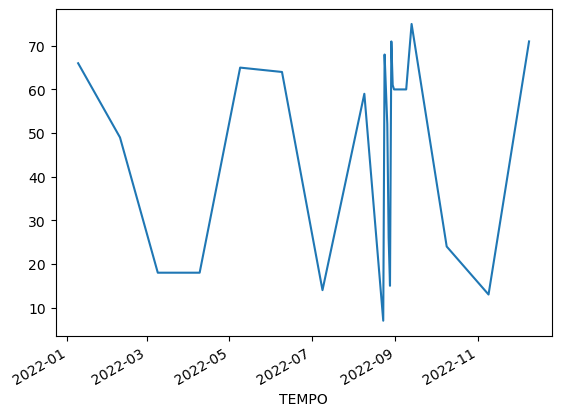

In [7]:
df.groupby('TEMPO').nunique()['ID'].plot()

In [8]:
df['STATUS'].value_counts()

STATUS
Não respondida    639
Respondida        271
Resolvido          67
Em réplica         36
Não resolvido       3
Name: count, dtype: int64

In [9]:
freq_hapvida = df['STATUS'].value_counts().reset_index()
freq_hapvida.columns = ['STATUS','Frequencia']

In [10]:
freq_hapvida

,STATUS,Frequencia
0,Não respondida,639
1,Respondida,271
2,Resolvido,67
3,Em réplica,36
4,Não resolvido,3


In [11]:
px.bar(freq_hapvida, x='STATUS', y='Frequencia', title='Frequência dos Status', labels={'Frequencia': 'Contagem'})

In [12]:
df['LOCAL'].iloc[0]

'Recife - PE'

In [13]:
df['LOCAL'].iloc[0].split('-')[1].strip()

'PE'

In [14]:
estado_lista = []
for i in range(len(df)):
    estado_lista.append(df['LOCAL'].iloc[i].split('-',2)[1].strip())

In [ ]:
estado_lista

In [16]:
df['ESTADO'] = estado_lista

In [17]:
df.head()

,ID,TEMA,LOCAL,TEMPO,CATEGORIA,STATUS,DESCRICAO,URL,ANO,MES,DIA,DIA_DO_ANO,SEMANA_DO_ANO,DIA_DA_SEMANA,TRIMETRES,CASOS,ESTADO
0,149490335,TEMPO DE ATENDIMENTO,Recife - PE,2022-01-09,Demora na execução<->Plano<->Planos de Saúde<-...,Não respondida,Acabei de sair de uma urgência por causa de at...,https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66,PE
1,149499817,Hapvida não tem nutrólogo,Salvador - BA,2022-01-09,Planos de saúde<->Qualidade do serviço prestad...,Não respondida,O Hapvida diz que fornece o serviço de nutrólo...,https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66,BA
2,149498293,Descaso de tratamento de Hemodiálise,Olinda - PE,2022-01-09,"Demora para autorização de consultas, exames e...",Respondida,"Meu irmão Wagner Santiago, estava internado de...",https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66,PE
3,149495455,DESORGANIZAÇÃO E FALTA DE RESOLUÇÃO DE PROBLEMA,Goiânia - GO,2022-01-09,Demora na execução<->Planos de saúde<->Planos ...,Não respondida,Agendei pelo chat um procedimento onde fui bem...,https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66,GO
4,149495285,Liberação de Procedimento,Fortaleza - CE,2022-01-09,Planos de saúde<->Planos de Saúde<->Hapvida Sa...,Respondida,Paguei fatura do plano em atraso e tal atraso ...,https://www.reclameaqui.com.br//hapvida-saude/...,2022,1,9,9,1,6,1,66,CE


In [18]:
df['ESTADO'].unique()

array(['PE', 'BA', 'GO', 'CE', 'SP', 'MA', 'PA', 'AL', 'RN', 'PB', '',
       'MS', 'ES', 'AM', 'MT', 'SE', 'MG', 'RS', 'RR', 'RJ', 'SC', 'PI',
       'TO', 'DF'], dtype=object)

In [19]:
df['ESTADO'].value_counts()

ESTADO
CE    212
PE    173
BA    155
SP    140
GO     91
RN     60
PB     26
AM     24
PA     23
MS     20
AL     19
SE     14
MA     14
MG      8
DF      7
MT      6
SC      6
PI      5
RS      3
RJ      3
ES      3
        2
RR      1
TO      1
Name: count, dtype: int64

In [20]:
correcao_estados = {
    '': 'Não Consta'
}

In [21]:
df['ESTADO'] = df['ESTADO'].replace(correcao_estados)

In [22]:
df['ESTADO'].unique()

array(['PE', 'BA', 'GO', 'CE', 'SP', 'MA', 'PA', 'AL', 'RN', 'PB',
       'Não Consta', 'MS', 'ES', 'AM', 'MT', 'SE', 'MG', 'RS', 'RR', 'RJ',
       'SC', 'PI', 'TO', 'DF'], dtype=object)

In [23]:
df['ESTADO'].value_counts()

ESTADO
CE            212
PE            173
BA            155
SP            140
GO             91
RN             60
PB             26
AM             24
PA             23
MS             20
AL             19
SE             14
MA             14
MG              8
DF              7
MT              6
SC              6
PI              5
RS              3
RJ              3
ES              3
Não Consta      2
RR              1
TO              1
Name: count, dtype: int64

In [24]:
def count_palavras(texto):
    return len(texto.split())

<Axes: ylabel='Density'>

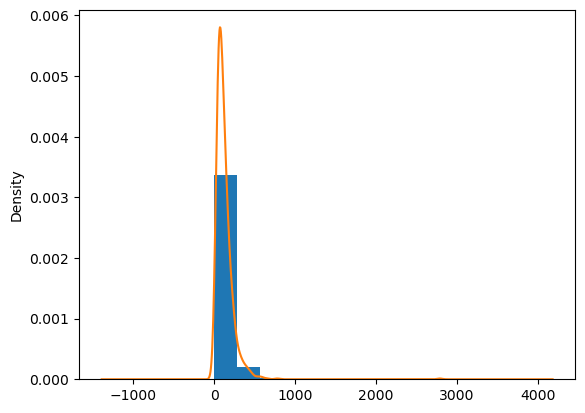

In [25]:
df['DESCRICAO'].apply(count_palavras).plot(kind='hist',density=True)
df['DESCRICAO'].apply(count_palavras).plot.kde()